In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
hewe=pd.read_excel("/content/drive/MyDrive/height-weight.xlsx")
hewe.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [3]:
hewe.describe()

,Height,Weight
count,222.000000,220.000000
mean,68.791172,185.067038
std,2.667899,19.885107
min,61.937323,135.655876
25%,67.022175,170.088760
50%,68.486663,182.735654
75%,70.838261,198.243521
max,76.709835,241.893563


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6b1b441310>,
      dtype=object)

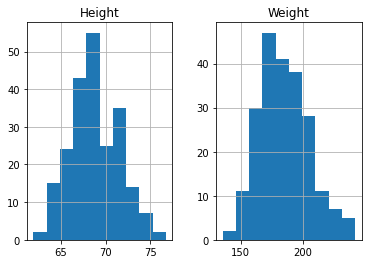

In [5]:
hewe.hist()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


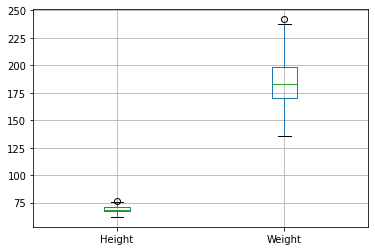

In [8]:
import matplotlib.pyplot as plt
hewe.boxplot()

In [13]:
hewe.isnull().sum()

Height     8
Weight    10
dtype: int64

In [14]:
hewe.Height.mean()

68.79117179988229

In [15]:
hewe.Height.fillna(68.79,inplace=True)

In [16]:
from scipy import stats
stats.shapiro(hewe.Height)

(0.9924241900444031, 0.28553465008735657)

In [17]:
hewe.Weight.mean()

185.06703792021924

In [18]:
hewe.Weight.fillna(185.0670,inplace=True)

In [19]:
stats.shapiro(hewe.Weight)

(0.9893983602523804, 0.08929328620433807)

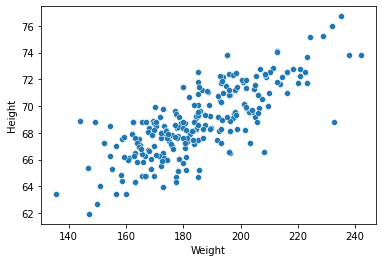

In [20]:
import seaborn as sns
sns.scatterplot(x="Weight",y="Height",data=hewe)

In [21]:
train=hewe.iloc[:184]
test=hewe.iloc[184:]

In [22]:
from scipy import stats
stats.pearsonr(hewe.Height,hewe.Weight)

(0.7714919403404391, 1.1463844563603105e-46)

In [23]:
import statsmodels.api as sm #to create the line equation y=mx+c
train_x=train.Height
train_y=train.Weight
train_xc=sm.add_constant(train_x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [24]:
model=sm.OLS(train_y,train_x).fit()
print(model.summary()) 

                                 OLS Regression Results                                
Dep. Variable:                 Weight   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.190e+04
Date:                Sun, 03 Apr 2022   Prob (F-statistic):                   2.88e-207
Time:                        17:57:07   Log-Likelihood:                         -746.41
No. Observations:                 184   AIC:                                      1495.
Df Residuals:                     183   BIC:                                      1498.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [25]:
model.predict(train_x)

0      198.218883
1      184.623194
2      198.925060
3      192.539048
4      187.575505
          ...    
179    181.161442
180    183.009535
181    186.693990
182    178.235767
183    178.745513
Length: 184, dtype: float64

In [27]:
import statsmodels.api as sm #to create the line equation y=mx+c
test_x=test.Height
test_y=test.Weight
test_xc=sm.add_constant(test_x)
predi=model.predict(test_x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


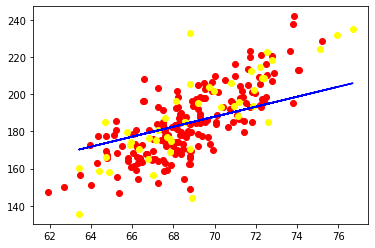

In [28]:
import matplotlib.pyplot as plt
plt.scatter(train.Height,train.Weight,color="red")
plt.scatter(test.Height,test.Weight,color="yellow")
plt.plot(test.Height,predi,color="blue")
plt.show()